In [17]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import pandas as pd
import numpy as np


In [18]:
df = pd.read_csv('/content/drive/MyDrive/datasets/rinhhack_credit_persona/credit_score_ds.csv', sep="|")

In [19]:
df

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,265.0,21.465380,High_spent_Small_value_payments,312.494089,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,266.0,21.465380,Low_spent_Large_value_payments,284.629162,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,267.0,21.465380,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,268.0,21.465380,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,269.0,21.465380,High_spent_Medium_value_payments,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,378.0,24.028477,High_spent_Large_value_payments,479.866228,1
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,379.0,24.028477,High_spent_Medium_value_payments,496.651610,1
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,380.0,24.028477,High_spent_Large_value_payments,516.809083,1
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,381.0,24.028477,Low_spent_Large_value_payments,319.164979,0


In [20]:
df = df.dropna()

In [32]:
df

,month,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,1,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,265.0,21.465380,High_spent_Small_value_payments,312.494089,0
1,2,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,266.0,21.465380,Low_spent_Large_value_payments,284.629162,0
2,3,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,267.0,21.465380,Low_spent_Medium_value_payments,331.209863,0
3,4,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,268.0,21.465380,Low_spent_Small_value_payments,223.451310,0
4,5,23.0,Scientist,19114.12,1824.843333,3.0,4.0,4.0,4.0,269.0,21.465380,High_spent_Medium_value_payments,341.489231,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,378.0,24.028477,High_spent_Large_value_payments,479.866228,1
99996,5,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,379.0,24.028477,High_spent_Medium_value_payments,496.651610,1
99997,6,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,380.0,24.028477,High_spent_Large_value_payments,516.809083,1
99998,7,25.0,Mechanic,39628.99,3359.415833,4.0,6.0,2.0,3.0,381.0,24.028477,Low_spent_Large_value_payments,319.164979,0


<Axes: xlabel='num_credit_inquiries', ylabel='num_of_loan'>

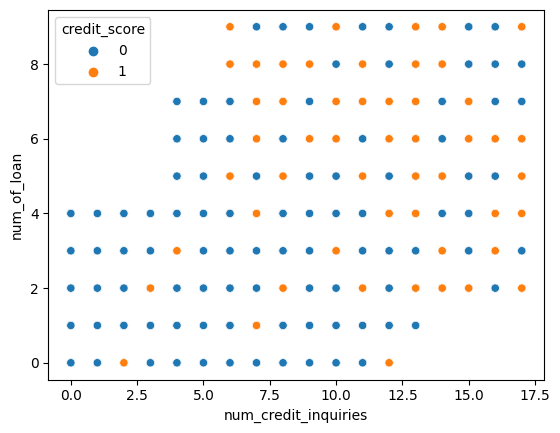

In [48]:
sns.scatterplot(x="num_credit_inquiries", y="num_of_loan", data=df, hue="credit_score")

<Axes: xlabel='num_bank_accounts', ylabel='num_of_loan'>

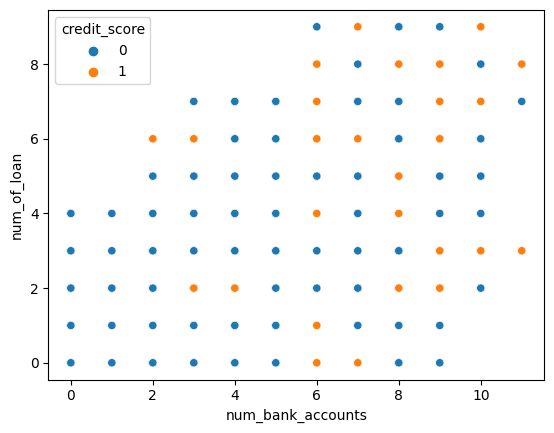

In [49]:
sns.scatterplot(x="num_bank_accounts", y="num_of_loan", data=df, hue="credit_score")

In [22]:
unique = df['payment_behaviour'].unique()
unique

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'High_spent_Large_value_payments'], dtype=object)

In [23]:
count = df['credit_score'].value_counts()
count

0    71002
1    28998
Name: credit_score, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    100000 non-null  int64  
 1   age                      100000 non-null  float64
 2   occupation               100000 non-null  object 
 3   annual_income            100000 non-null  float64
 4   monthly_inhand_salary    100000 non-null  float64
 5   num_bank_accounts        100000 non-null  float64
 6   num_credit_card          100000 non-null  float64
 7   num_of_loan              100000 non-null  float64
 8   num_credit_inquiries     100000 non-null  float64
 9   credit_history_age       100000 non-null  float64
 10  amount_invested_monthly  100000 non-null  float64
 11  payment_behaviour        100000 non-null  object 
 12  monthly_balance          100000 non-null  float64
 13  credit_score             100000 non-null  int64  
dtypes: fl

In [31]:
# Найти среднее значение
mean_value = df['amount_invested_monthly'].mean()

# Найти медиану
median_value = df['amount_invested_monthly'].median()

# Найти максимальное значение
max_value = df['amount_invested_monthly'].max()

# Найти минимальное значение
min_value = df['amount_invested_monthly'].min()

# Вывести результаты
print(f'Mean: {mean_value}')
print(f'Median: {median_value}')
print(f'Max: {max_value}')
print(f'Min: {min_value}')

Mean: 55.101314900630314
Median: 45.156549633147954
Max: 434.1910893520318
Min: 0.0


In [9]:
df1 = pd.get_dummies(df, drop_first=True)

In [10]:
df1

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,...,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,1,23.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,265.0,21.465380,...,0,0,1,0,0,0,1,0,0,0
1,2,23.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,266.0,21.465380,...,0,0,1,0,0,0,0,1,0,0
2,3,23.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,267.0,21.465380,...,0,0,1,0,0,0,0,0,1,0
3,4,23.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,268.0,21.465380,...,0,0,1,0,0,0,0,0,0,1
4,5,23.0,19114.12,1824.843333,3.0,4.0,4.0,4.0,269.0,21.465380,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,4,25.0,39628.99,3359.415833,4.0,6.0,2.0,3.0,378.0,24.028477,...,0,0,0,0,0,0,0,0,0,0
99996,5,25.0,39628.99,3359.415833,4.0,6.0,2.0,3.0,379.0,24.028477,...,0,0,0,0,0,1,0,0,0,0
99997,6,25.0,39628.99,3359.415833,4.0,6.0,2.0,3.0,380.0,24.028477,...,0,0,0,0,0,0,0,0,0,0
99998,7,25.0,39628.99,3359.415833,4.0,6.0,2.0,3.0,381.0,24.028477,...,0,0,0,0,0,0,0,1,0,0


In [11]:
x = df1.drop(['credit_score'], axis=1)
y = df1['credit_score']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **tree**

In [ ]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.7956125
0.77995


# **boost**

In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

0.9998625
0.8745


In [30]:
y_pred_proba = model.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.04, 0.82, 0.02, ..., 0.4 , 0.04, 1.  ])

In [57]:
res1 = 0
res2 = 0
res3 = 0
for i in y_pred_proba:
  if i <= 0.5 and i >= 0.3:
    res1 += 1
  if i > 0.5:
    res2 += 1
  if i < 0.3:
    res3 += 1
print(f"хороших - {res3}")
print(f"плохих - {res2}")
print(f"хз - {res1}")

хороших - 12348
плохих - 5426
хз - 2226


In [31]:
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test, y_pred_proba)

In [32]:
print(f'AUC-ROC Score: {auc_score}')

AUC-ROC Score: 0.9369455905170986


In [60]:
from sklearn.metrics import confusion_matrix
# Получаем предсказания
# y_pred = model.predict(x_test)
y_pred = np.where(y_pred_proba >= 0.3, 1, 0)

# Получаем матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)

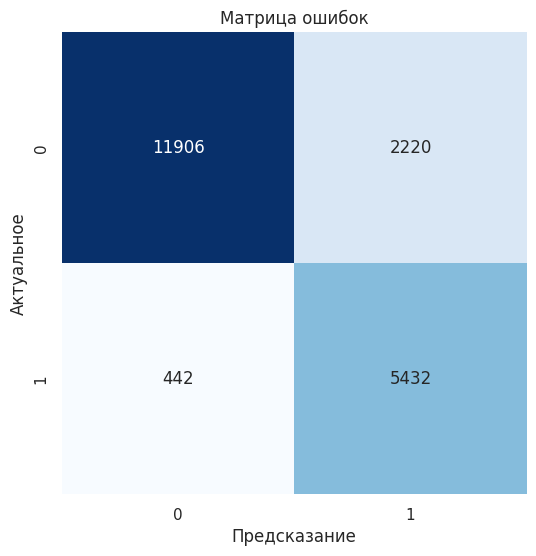

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Включаем стиль seaborn для лучшей визуализации
sns.set()

# Создаем изображение и оси
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["0", "1"],
            yticklabels=["0", "1"])

# Добавляем подписи
plt.xlabel("Предсказание")
plt.ylabel("Актуальное")
plt.title("Матрица ошибок")

# Отображаем изображение
plt.show()

Text(46.25, 0.5, 'Актуальное')

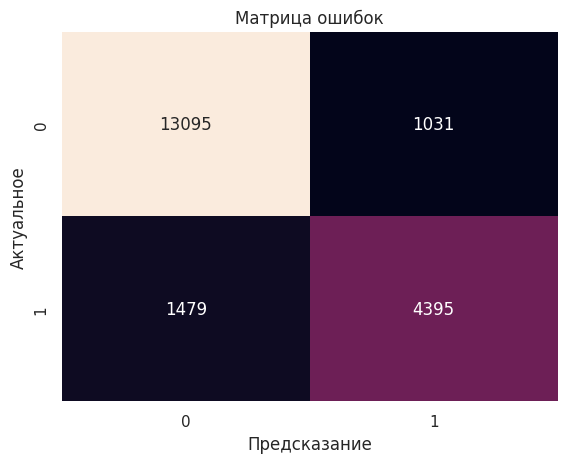

In [37]:
sns.heatmap(conf_matrix, annot=True,  fmt="d",cbar=False,)

plt.title("Матрица ошибок")
plt.xlabel("Предсказание")
plt.ylabel("Актуальное")

In [ ]:
y_pred_proba

array([0.08 , 0.77 , 0.015, ..., 0.465, 0.085, 0.95 ])

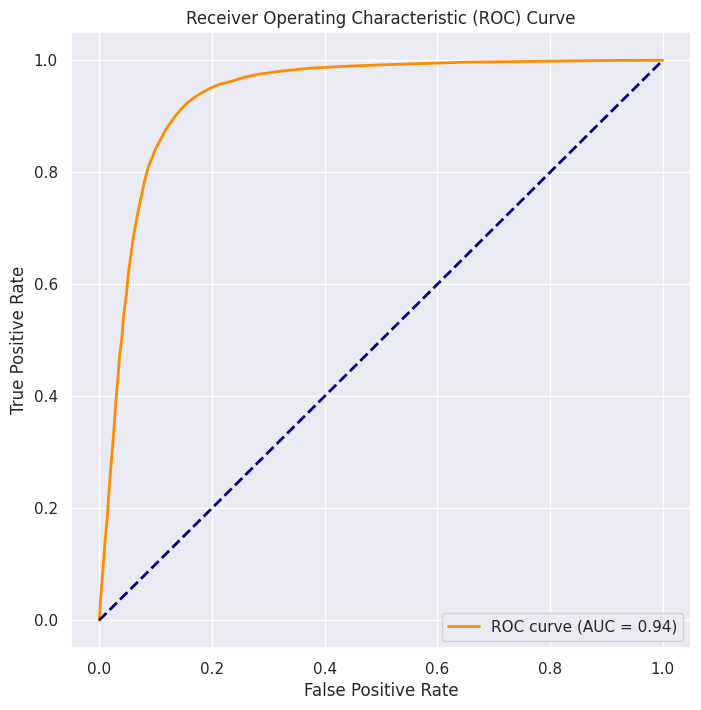

In [ ]:
from sklearn.metrics import roc_curve, auc

# Вычисляем ROC-кривую и AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Строим ROC-кривую
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Случайная модель

# Добавляем подписи и легенду
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Отображаем график
plt.show()

In [ ]:
import joblib
joblib.dump(model, 'RandomForest_auc-roc-0.9369.joblib')

['RandomForest_auc-roc-0.9369.joblib']

In [ ]:
!pip install joblib


# **keras**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf



In [ ]:

# Предположим, что X содержит ваши признаки, y - целевой признак (0 или 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:

# Нормализуем данные
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:

# Создаем нейронную сеть
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [ ]:

# Компилируем модель с использованием AUC-ROC в качестве метрики
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])


In [ ]:

# Обучаем модель
model.fit(X_train, y_train, epochs=200, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/200
1250/1250 [==============================] - 14s 9ms/step - loss: 0.3385 - accuracy: 0.8488 - auc: 0.9115 - val_loss: 0.4104 - val_accuracy: 0.8188 - val_auc: 0.8729
Epoch 2/200
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3395 - accuracy: 0.8479 - auc: 0.9108 - val_loss: 0.4124 - val_accuracy: 0.8180 - val_auc: 0.8711
Epoch 3/200
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3402 - accuracy: 0.8478 - auc: 0.9105 - val_loss: 0.4107 - val_accuracy: 0.8192 - val_auc: 0.8729
Epoch 4/200
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3398 - accuracy: 0.8478 - auc: 0.9107 - val_loss: 0.4160 - val_accuracy: 0.8156 - val_auc: 0.8704
Epoch 5/200
1250/1250 [==============================] - 4s 4ms/step - loss: 0.3403 - accuracy: 0.8473 - auc: 0.9105 - val_loss: 0.4125 - val_accuracy: 0.8191 - val_auc: 0.8731
Epoch 6/200
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3402 - accuracy: 0.8489 - auc: 0.91

KeyboardInterrupt: ignored

In [ ]:

# Предсказываем вероятности для тестового набора
y_pred_proba = model.predict(X_test)


In [ ]:

# Вычисляем AUC-ROC
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f'AUC-ROC Score: {auc_score}')

In [ ]:
from keras.layers import Input, Dense, Attention, concatenate
from keras.models import Model

input_layer = Input(shape=(X_train.shape[1],))
attention_probs = Dense(X_train.shape[1], activation='softmax', name='attention_probs')(input_layer)
attention_mul = concatenate([input_layer, attention_probs], name='attention_mul', axis=-1)

hidden_layer1 = Dense(1024, activation='relu')(attention_mul)
hidden_layer2 = Dense(128, activation='relu')(hidden_layer1)

output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

model = Model(inputs=input_layer, outputs=output_layer)


In [ ]:
# Компилируем модель с использованием AUC-ROC в качестве метрики
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=[tf.keras.metrics.AUC(name='auc')])

In [ ]:
model.fit(X_train, y_train, epochs=16, batch_size=64, validation_split=0.1)

Epoch 1/16
1125/1125 [==============================] - 6s 5ms/step - loss: 0.5091 - auc: 0.7637 - val_loss: 0.4943 - val_auc: 0.7789
Epoch 2/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.4898 - auc: 0.7814 - val_loss: 0.4898 - val_auc: 0.7854
Epoch 3/16
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4847 - auc: 0.7879 - val_loss: 0.4869 - val_auc: 0.7892
Epoch 4/16
1125/1125 [==============================] - 5s 4ms/step - loss: 0.4808 - auc: 0.7930 - val_loss: 0.4847 - val_auc: 0.7915
Epoch 5/16
1125/1125 [==============================] - 5s 5ms/step - loss: 0.4776 - auc: 0.7968 - val_loss: 0.4825 - val_auc: 0.7941
Epoch 6/16
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4748 - auc: 0.8001 - val_loss: 0.4812 - val_auc: 0.7962
Epoch 7/16
1125/1125 [==============================] - 4s 4ms/step - loss: 0.4724 - auc: 0.8030 - val_loss: 0.4788 - val_auc: 0.7984
Epoch 8/16
1125/1125 [==============================] - 5s 5ms

In [ ]:
y_pred_proba = model.predict(X_test)

625/625 [==============================] - 1s 2ms/step


In [ ]:
auc_score = roc_auc_score(y_test, y_pred_proba)

print(f'AUC-ROC Score: {auc_score}')

AUC-ROC Score: 0.8120836784326055


# **test**

In [ ]:
!pip install joblib

In [ ]:
import joblib

In [29]:
model = joblib.load('RandomForest_auc-roc-0.9369.joblib')

In [ ]:
y_pred_proba = loaded_model.predict_proba(x_test)[:, 1]
y_pred_proba

array([0.04, 0.82, 0.02, ..., 0.4 , 0.04, 1.  ])

In [13]:
x_test

,month,age,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_of_loan,num_credit_inquiries,credit_history_age,amount_invested_monthly,...,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
75721,2,30.0,43391.96,3688.996667,1.0,5.0,0.0,0.0,284.0,47.438673,...,0,0,0,0,0,0,0,0,0,0
80184,1,18.0,14351.21,1274.934167,8.0,7.0,6.0,9.0,98.0,21.200962,...,0,0,1,0,0,0,0,0,0,1
19864,1,41.0,130125.04,10871.753333,5.0,2.0,2.0,3.0,191.0,103.431653,...,0,0,0,0,0,0,0,0,0,1
76699,4,35.0,20107.21,1631.600833,6.0,6.0,2.0,11.0,232.0,10.917189,...,0,0,0,0,0,0,0,0,0,1
92991,8,27.0,92186.19,7487.182500,1.0,2.0,4.0,4.0,249.0,84.280516,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32595,4,28.0,50940.09,4106.007500,8.0,7.0,5.0,6.0,149.0,58.511065,...,1,0,0,0,0,0,0,1,0,0
29313,2,32.0,30819.56,2547.296667,7.0,3.0,4.0,5.0,170.0,28.766089,...,0,0,0,0,0,1,0,0,0,0
37862,7,40.0,24004.50,1935.375000,4.0,3.0,5.0,10.0,219.0,49.068831,...,0,0,0,0,0,0,0,0,0,1
53421,6,37.0,35185.56,2962.130000,6.0,4.0,3.0,0.0,252.0,66.179147,...,0,0,0,0,0,0,0,0,0,1


In [16]:
y_test.head(10)

75721    0
80184    1
19864    0
76699    1
92991    0
76434    1
84004    0
80917    1
60767    0
50074    0
Name: credit_score, dtype: int64

In [ ]:
import pandas as pd
x_test.to_csv('datatest.csv', index=False)

In [ ]:
tmp1 = x_test.head(10)

In [ ]:
tmp1.to_json('data.json', orient='split')

In [ ]:
import pandas as pd
user_data = {
    "age": 42.0,
    "amount_invested_monthly": 74.1835243049,
    "annual_income": 44998.71,
    "credit_history_age": 227.0,
    "month": 3,
    "monthly_balance": 411.9493600449,
    "monthly_inhand_salary": 3916.8925,
    "num_bank_accounts": 10.0,
    "num_credit_card": 5.0,
    "num_credit_inquiries": 8.0,
    "num_of_loan": 3.0,
    "occupation_Architect": 0,
    "occupation_Developer": 0,
    "occupation_Doctor": 0,
    "occupation_Engineer": 0,
    "occupation_Entrepreneur": 0,
    "occupation_Journalist": 0,
    "occupation_Lawyer": 0,
    "occupation_Manager": 0,
    "occupation_Mechanic": 0,
    "occupation_Media_Manager": 0,
    "occupation_Musician": 0,
    "occupation_Scientist": 0,
    "occupation_Teacher": 1,
    "occupation_Writer": 0,
    "payment_behaviour_High_spent_Medium_value_payments": 0,
    "payment_behaviour_High_spent_Small_value_payments": 1,
    "payment_behaviour_Low_spent_Large_value_payments": 0,
    "payment_behaviour_Low_spent_Medium_value_payments": 0,
    "payment_behaviour_Low_spent_Small_value_payments": 0
}
df = pd.DataFrame([user_data])
df

,age,amount_invested_monthly,annual_income,credit_history_age,month,monthly_balance,monthly_inhand_salary,num_bank_accounts,num_credit_card,num_credit_inquiries,...,occupation_Media_Manager,occupation_Musician,occupation_Scientist,occupation_Teacher,occupation_Writer,payment_behaviour_High_spent_Medium_value_payments,payment_behaviour_High_spent_Small_value_payments,payment_behaviour_Low_spent_Large_value_payments,payment_behaviour_Low_spent_Medium_value_payments,payment_behaviour_Low_spent_Small_value_payments
0,42.0,74.183524,44998.71,227.0,3,411.94936,3916.8925,10.0,5.0,8.0,...,0,0,0,1,0,0,1,0,0,0


In [ ]:
y_pred = loaded_model.predict_proba(df)

ValueError: ignored

In [ ]:
data = {"columns":["month","age","annual_income","monthly_inhand_salary","num_bank_accounts","num_credit_card","num_of_loan","num_credit_inquiries","credit_history_age","amount_invested_monthly","monthly_balance","occupation_Architect","occupation_Developer","occupation_Doctor","occupation_Engineer","occupation_Entrepreneur","occupation_Journalist","occupation_Lawyer","occupation_Manager","occupation_Mechanic","occupation_Media_Manager","occupation_Musician","occupation_Scientist","occupation_Teacher","occupation_Writer","payment_behaviour_High_spent_Medium_value_payments","payment_behaviour_High_spent_Small_value_payments","payment_behaviour_Low_spent_Large_value_payments","payment_behaviour_Low_spent_Medium_value_payments","payment_behaviour_Low_spent_Small_value_payments"],"index":[75721,80184,19864,76699,92991,76434,84004,80917,60767,50074],"data":[[2,30.0,43391.96,3688.9966666667,1.0,5.0,0.0,0.0,284.0,47.4386731182,554.9302816036,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0],[1,18.0,14351.21,1274.9341666667,8.0,7.0,6.0,9.0,98.0,21.2009624539,238.3144849567,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1],[1,41.0,130125.04,10871.7533333333,5.0,2.0,2.0,3.0,191.0,103.4316526582,271.7569869253,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1],[4,35.0,20107.21,1631.6008333333,6.0,6.0,2.0,11.0,232.0,10.9171886308,359.2339137888,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1],[8,27.0,92186.19,7487.1825,1.0,2.0,4.0,4.0,249.0,84.2805156717,697.400556863,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0],[3,42.0,44998.71,3916.8925,10.0,5.0,3.0,8.0,227.0,74.1835243049,411.9493600449,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0],[5,34.0,56500.7,4448.0623232866,2.0,3.0,2.0,3.0,391.0,53.4057624096,66.5267625694,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1],[6,20.0,135178.44,11542.87,0.0,6.0,0.0,3.0,307.0,191.4980615328,474.5545205698,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1],[8,35.0,75455.34,6116.945,3.0,6.0,1.0,8.0,93.0,92.3086511496,533.7035485615,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0],[3,22.0,9155.455,470.9545833333,6.0,7.0,5.0,11.0,57.0,0.0,295.8271836957,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1]]}

In [ ]:
df = pd.DataFrame(columns=data["columns"])
print(df)

Empty DataFrame
Columns: [month, age, annual_income, monthly_inhand_salary, num_bank_accounts, num_credit_card, num_of_loan, num_credit_inquiries, credit_history_age, amount_invested_monthly, monthly_balance, occupation_Architect, occupation_Developer, occupation_Doctor, occupation_Engineer, occupation_Entrepreneur, occupation_Journalist, occupation_Lawyer, occupation_Manager, occupation_Mechanic, occupation_Media_Manager, occupation_Musician, occupation_Scientist, occupation_Teacher, occupation_Writer, payment_behaviour_High_spent_Medium_value_payments, payment_behaviour_High_spent_Small_value_payments, payment_behaviour_Low_spent_Large_value_payments, payment_behaviour_Low_spent_Medium_value_payments, payment_behaviour_Low_spent_Small_value_payments]
Index: []

[0 rows x 30 columns]
